In [1]:
# -*- coding: utf-8 -*-
###"""
###Created on Sat Mar  8 00:24:58 2025

In [2]:
####@author: drago
####8.3.2025. 14:08
####002
###"""

### 001 kreiranje klase

In [4]:
import pandas as pd

In [5]:
class Asteroid:
    def __init__(self, *args):
        field_names = [
            "SMOC_ID", "OBJ_ID_RUN", "OBJ_ID_COL", "OBJ_ID_FIELD", "OBJ_ID_OBJ",
            "ROWC", "COLC", "JD_ZERO", "RA", "DEC", "LAMBDA", "BETA", "PHI",
            "VMU", "VMU_ERROR", "VNU", "VNU_ERROR", "VLAMBDA", "VBETA", 
            "U_MAG", "U_ERR", "G_MAG", "G_ERR", "R_MAG", "R_ERR", "I_MAG", "I_ERR",
            "Z_MAG", "Z_ERR", "A_MAG", "A_ERR", "V_MAG", "B_MAG", "IDFLAG", "AST_NUMBER",
            "PROV_ID", "D_COUNTER", "TOTAL_D_COUNT", "RA_COMPUTED", "DEC_COMPUTED", 
            "V_MAG_COMPUTED", "R_DIST", "G_DIST", "PHASE", "OSC_CAT_ID", "H", "G",
            "ARC", "EPOCH_OSC", "A_OSC", "E_OSC", "I_OSC", "LON_OSC", "AP_OSC", 
            "M_OSC", "PROP_CAT_ID", "A_PROP", "E_PROP", "SIN_I_PROP"
        ]
        
        for field, value in zip(field_names, args):
            setattr(self, field, value)
    
    def __repr__(self):
        return f"Asteroid({', '.join([f'{field}={getattr(self, field)}' for field in vars(self)])})"


<br>
## 002 ucitavanje objekata<br>
def LoadAst(file_path):<br>
    asteroids = []<br>
    <br>
    with open(file_path, 'r') as file:<br>
        for line in file:<br>
            data = line.strip().split()<br>
            if len(data) == 59:<br>
                asteroid = Asteroid(*data)<br>
                asteroids.append(asteroid)<br>
    <br>
    return asteroids<br>


### 3 005 modifikovana verzija za ucitavanje <br>
### ovde pazimo na velicinu magnituda asteroida<br>
### kao i da je velika poluosa veca od 0.5

# 009 ubaceni i filteri za rayliku filtera  GR RI i IZ

In [9]:
def LoadAst(file_path):
    asteroids = []
    
    with open(file_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) == 59:
                try:
                    U_MAG, G_MAG, R_MAG, I_MAG, Z_MAG = map(float, [data[19], data[21], data[23], data[25], data[27]])
                    A_OSC = float(data[49])
                    
                    # Apply filtering conditions
                    if any(mag > 35 for mag in [U_MAG, G_MAG, R_MAG, I_MAG, Z_MAG]) or A_OSC < 0.5:
                        continue  # Skip asteroid if any magnitude is greater than 35 or A_OSC < 0.5
                    
                    GR_diff = G_MAG - R_MAG
                    RI_diff = R_MAG - I_MAG
                    IZ_diff = I_MAG - Z_MAG
                    asteroid = Asteroid(*data)
                    asteroids.append(asteroid)
                except ValueError:
                    continue  # Skip invalid entries
    
    return asteroids



Example usage

In [12]:
asteroid_list = LoadAst("sdssmocadr4.tab")
## asteroid_list = LoadAst("SDSSSample.txt")

In [13]:
print(asteroid_list[:5])  # Print first 5 asteroids with all fields
print("ucitano "+ str(len(asteroid_list)))  # Print first 5 asteroids with all fields

[Asteroid(SMOC_ID=s0583b, OBJ_ID_RUN=1033, OBJ_ID_COL=1, OBJ_ID_FIELD=179, OBJ_ID_OBJ=28, ROWC=110.214, COLC=1132.080, JD_ZERO=2451464.74149, RA=343.782698, DEC=-0.925992, LAMBDA=344.701049, BETA=5.523256, PHI=-34.752219, VMU=-0.0692, VMU_ERROR=0.0034, VNU=-0.0674, VNU_ERROR=0.0034, VLAMBDA=-0.0902, VBETA=-0.0357, U_MAG=20.06, U_ERR=0.05, G_MAG=18.52, G_ERR=0.05, R_MAG=17.98, R_ERR=0.02, I_MAG=17.79, I_ERR=0.02, Z_MAG=17.67, Z_ERR=0.03, A_MAG=-0.01, A_ERR=0.04, V_MAG=18.20, B_MAG=18.95, IDFLAG=1, AST_NUMBER=1872, PROV_ID=-, D_COUNTER=1, TOTAL_D_COUNT=2, RA_COMPUTED=343.782211, DEC_COMPUTED=-0.926056, V_MAG_COMPUTED=18.36, R_DIST=5.087, G_DIST=4.239, PHASE=6.49, OSC_CAT_ID=ASTORB_20080108, H=11.20, G=0.15, ARC=1914, EPOCH_OSC=54500.500000, A_OSC=5.29707540, E_OSC=0.04669783, I_OSC=14.652730, LON_OSC=188.856079, AP_OSC=113.463605, M_OSC=291.169195, PROP_CAT_ID=-, A_PROP=0.00000000, E_PROP=0.00000000, SIN_I_PROP=0.000000), Asteroid(SMOC_ID=s05880, OBJ_ID_RUN=1033, OBJ_ID_COL=2, OBJ_ID_FIE

In [14]:
komada = len(asteroid_list)

In [15]:
AllPe=[]

### 003 crtanje grafika avs e 

In [17]:
import matplotlib.pyplot as plt

In [18]:
def extract_and_plot(asteroid_list):
    global AllPe  # Ensure AllPe is accessible globally
    # Extract A_OSC and E_OSC values
    AllPa = [float(asteroid.A_OSC) for asteroid in asteroid_list if asteroid.A_OSC.replace('.', '', 1).isdigit()]
    AllPe = [float(asteroid.E_OSC) for asteroid in asteroid_list if asteroid.E_OSC.replace('.', '', 1).isdigit()]
    
    # Create scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(AllPa, AllPe, alpha=0.5)
    plt.xlabel("A_OSC (Semi-Major Axis)")
    plt.ylabel("E_OSC (Eccentricity)")
    plt.title("Asteroid Orbital Parameters")
    plt.xlim(0, 6)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

Run the function

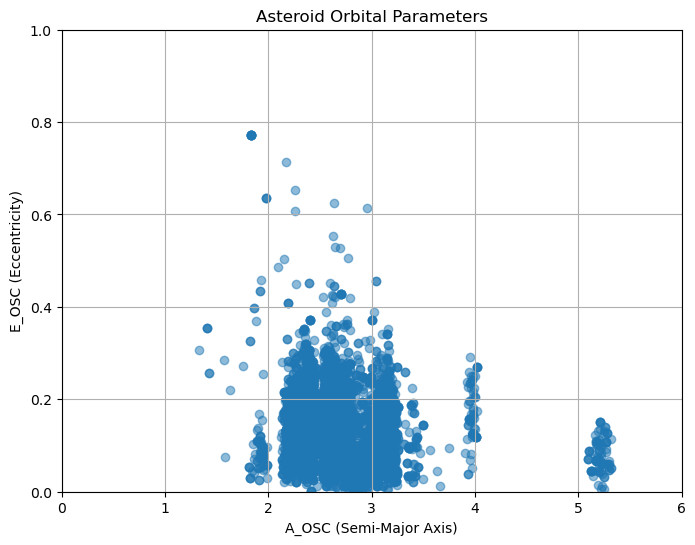

In [20]:
extract_and_plot(asteroid_list)

### 004 crtanje svih filtera

In [22]:
def extract_magnitudes(asteroid_list):
    AllPa = [float(asteroid.A_OSC) for asteroid in asteroid_list if asteroid.A_OSC.replace('.', '', 1).isdigit()]
    AllFilU = [float(asteroid.U_MAG) for asteroid in asteroid_list if asteroid.U_MAG.replace('.', '', 1).isdigit()]
    AllFilG = [float(asteroid.G_MAG) for asteroid in asteroid_list if asteroid.G_MAG.replace('.', '', 1).isdigit()]
    AllFilR = [float(asteroid.R_MAG) for asteroid in asteroid_list if asteroid.R_MAG.replace('.', '', 1).isdigit()]
    AllFilI = [float(asteroid.I_MAG) for asteroid in asteroid_list if asteroid.I_MAG.replace('.', '', 1).isdigit()]
    AllFilZ = [float(asteroid.Z_MAG) for asteroid in asteroid_list if asteroid.Z_MAG.replace('.', '', 1).isdigit()]
    
    return AllPa, AllFilU, AllFilG, AllFilR, AllFilI, AllFilZ

In [23]:
def plot_magnitudes(AllPa, AllFilU, AllFilG, AllFilR, AllFilI, AllFilZ):
    filters = [AllFilU, AllFilG, AllFilR, AllFilI, AllFilZ]
    labels = ['U_MAG', 'G_MAG', 'R_MAG', 'I_MAG', 'Z_MAG']
    
    for i in range(5):
        plt.figure(figsize=(8, 6))
        plt.scatter(AllPa, filters[i], alpha=0.5)
        plt.xlabel("A_OSC (Semi-Major Axis)")
        plt.ylabel(labels[i])
        plt.title(f"Asteroid {labels[i]} vs A_OSC")
        plt.xlim(0, 6)
        plt.grid(True)
        plt.show()

Extract magnitudes

In [25]:
AllPa, AllFilU, AllFilG, AllFilR, AllFilI, AllFilZ = extract_magnitudes(asteroid_list)

Plot magnitudes

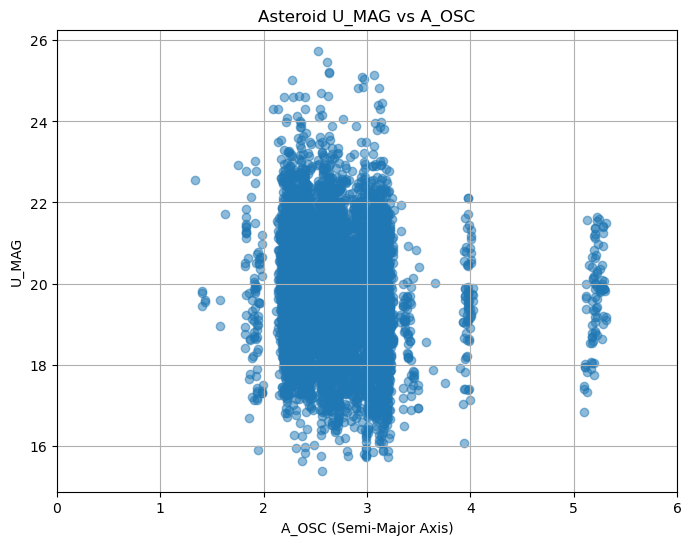

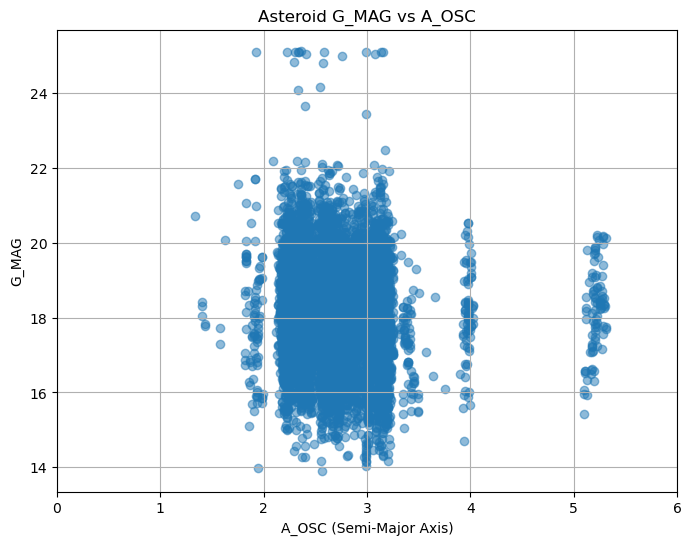

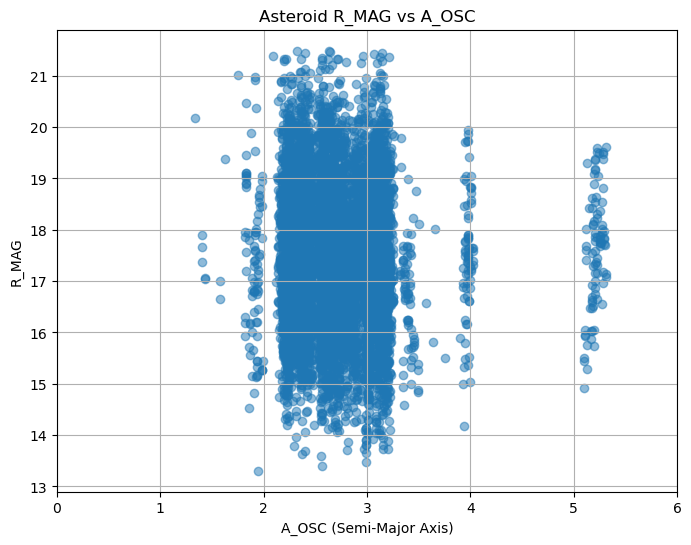

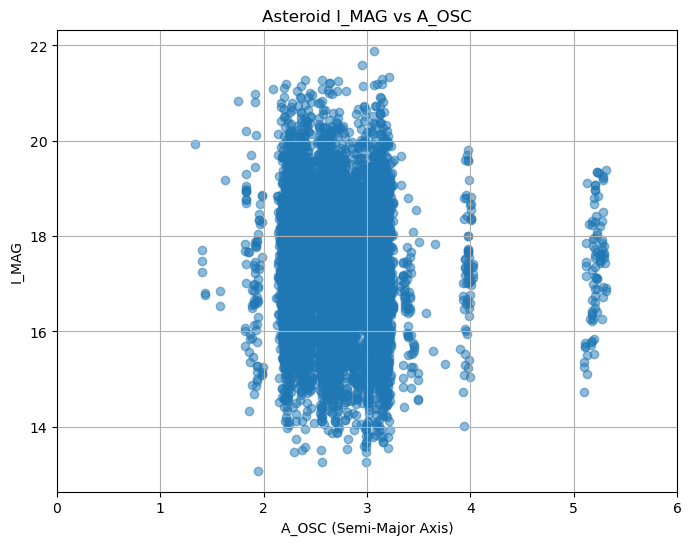

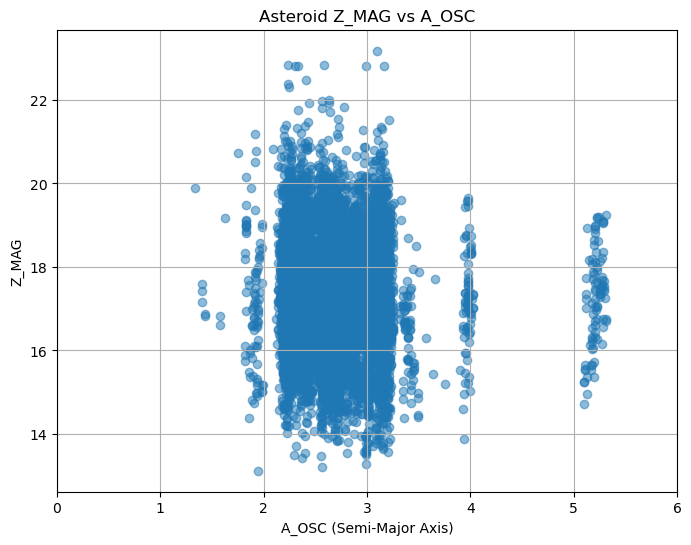

In [27]:
plot_magnitudes(AllPa, AllFilU, AllFilG, AllFilR, AllFilI, AllFilZ)

 provera broja po listama

In [29]:
print("ucitano ast list  "+ str(len(asteroid_list))) 
print("ucitano a "+   str(len(AllPa))) 
print("ucitano e "+   str(len(AllPe))) 
print("ucitano FilU "+ str(len(AllFilU))) 
print("ucitano FilG "+ str(len(AllFilG)))  
print("ucitano FilR "+ str(len(AllFilR))) 
print("ucitano FilI "+ str(len(AllFilI)))  
print("ucitano FilZ "+ str(len(AllFilZ))) 

ucitano ast list  8946
ucitano a 8946
ucitano e 8946
ucitano FilU 8946
ucitano FilG 8946
ucitano FilR 8946
ucitano FilI 8946
ucitano FilZ 8946


007 uvodimo razlike filtera i crtamo:

In [31]:
def CreateFilterDifferences(AllPa, AllFilG, AllFilR, AllFilI, AllFilZ):
    # Compute differences
    ListGR = [g - r for g, r in zip(AllFilG, AllFilR)]
    ListRI = [r - i for r, i in zip(AllFilR, AllFilI)]
    ListIZ = [i - z for i, z in zip(AllFilI, AllFilZ)]
    ListGZ = [g - z for g, z in zip(AllFilG, AllFilZ)]
    ListRZ = [r - z for r, z in zip(AllFilR, AllFilZ)]
    
    # Plot differences
    differences = [(ListGR, 'G-R'), (ListRI, 'R-I'), (ListIZ, 'I-Z'), (ListGZ, 'G-Z'), (ListRZ, 'R-Z')]
    
    for diff_list, label in differences:
        plt.figure(figsize=(8, 6))
        plt.scatter(AllPa, diff_list, alpha=0.5)
        plt.xlabel("A_OSC (Semi-Major Axis)")
        plt.ylabel(f"{label} Magnitude Difference")
        plt.title(f"Asteroid {label} vs A_OSC")
        plt.grid(True)
        plt.show()

Call the function with extracted data

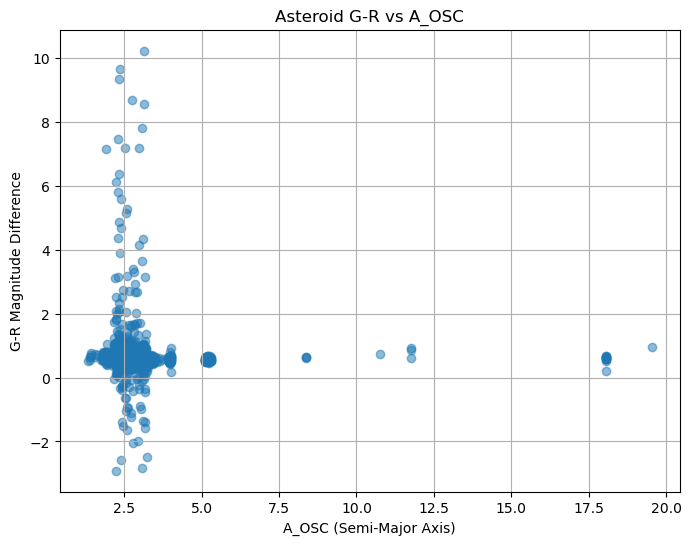

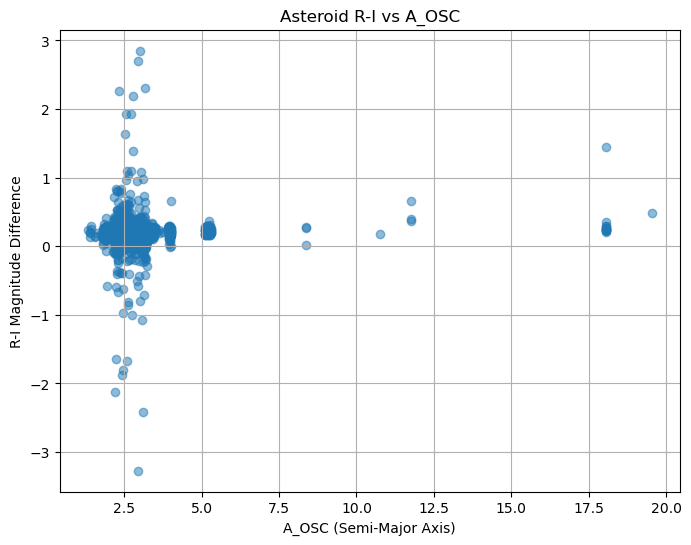

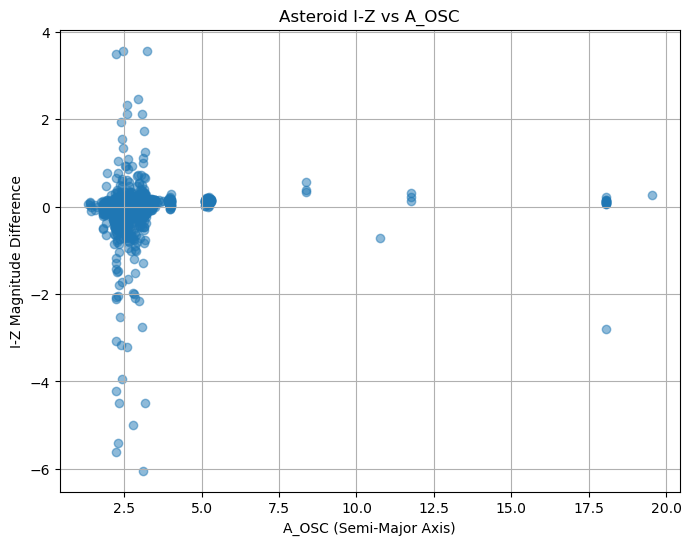

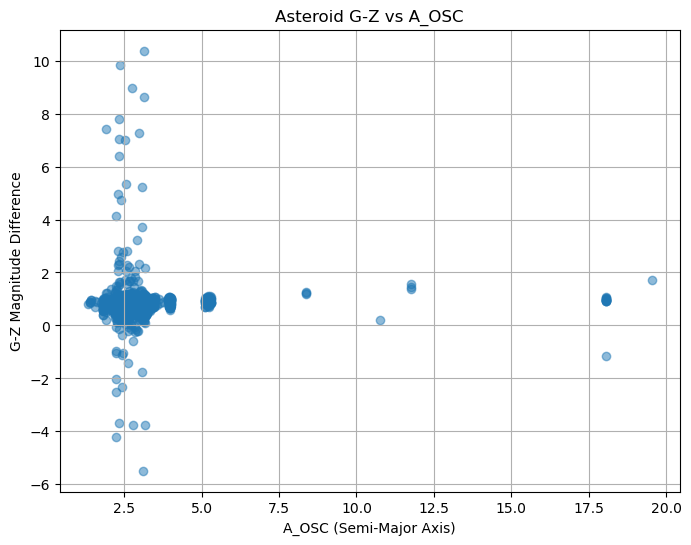

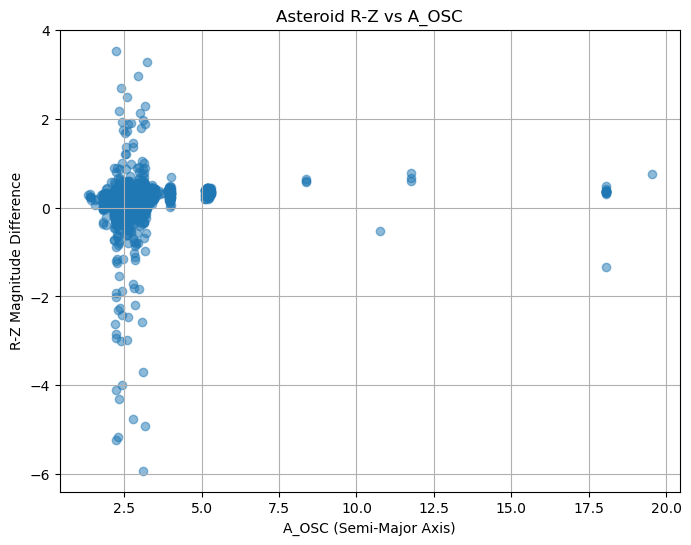

In [33]:
CreateFilterDifferences(AllPa, AllFilG, AllFilR, AllFilI, AllFilZ)
    
    

008 odredjujemo PC i crtamo prve grafike  ... btw : theta je preuzet iz rada .. ne znam kako se odredjuje

In [35]:
import math

In [36]:
def CreateListPC(AllFilG, AllFilR, AllFilI):
    theta = 0.370  # Theta in radians
    
    ListGR = [g - r for g, r in zip(AllFilG, AllFilR)]
    ListRI = [r - i for r, i in zip(AllFilR, AllFilI)]
    ListPC = [math.cos(theta) * gr + math.sin(theta) * ri for gr, ri in zip(ListGR, ListRI)]
    
    return ListPC, ListGR, ListRI

In [37]:
def plot_scatter(ListGR, ListRI, ListPC, ListIZ):
    plt.figure(figsize=(8, 6))
    plt.scatter(ListGR, ListRI, alpha=0.5)
    plt.xlabel("G-R")
    plt.ylabel("R-I")
    plt.title("Scatter Plot: G-R vs R-I")
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(ListPC, ListIZ, alpha=0.5)
    plt.xlabel("PC")
    plt.ylabel("I-Z")
    plt.title("Scatter Plot: PC vs I-Z")
    plt.grid(True)
    plt.show()

Generate ListPC and plot

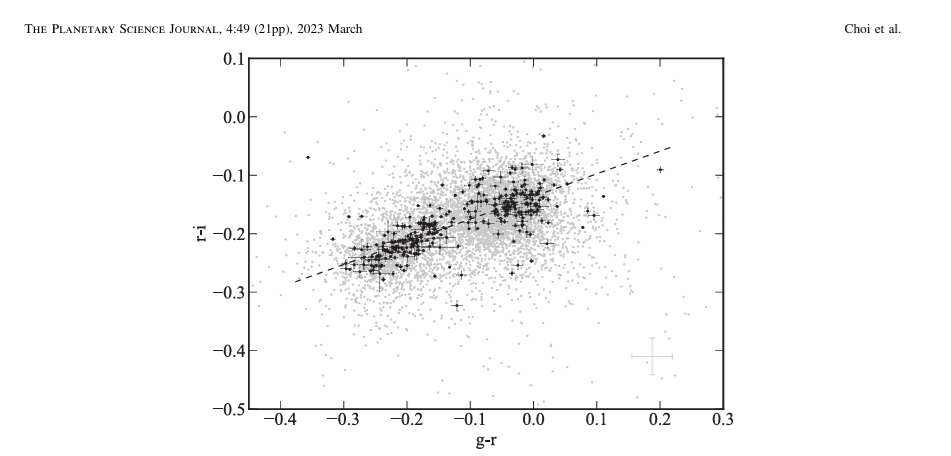

In [52]:

from IPython.display import Image

# Display a local image
Image(filename="origslika01GRRI.png")



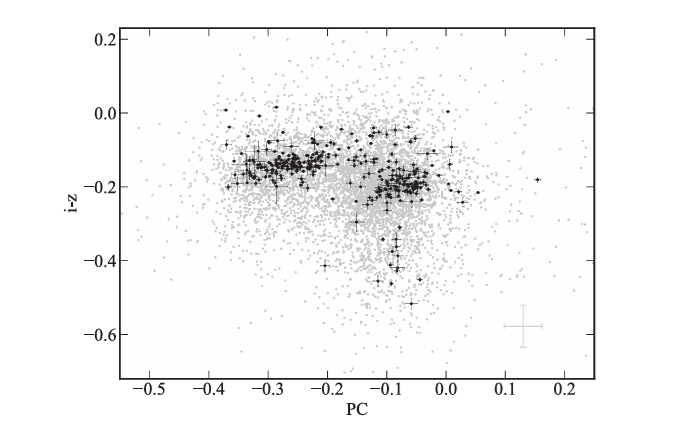

In [50]:
from IPython.display import Image

Image(filename="origslika02PCIZ.png")

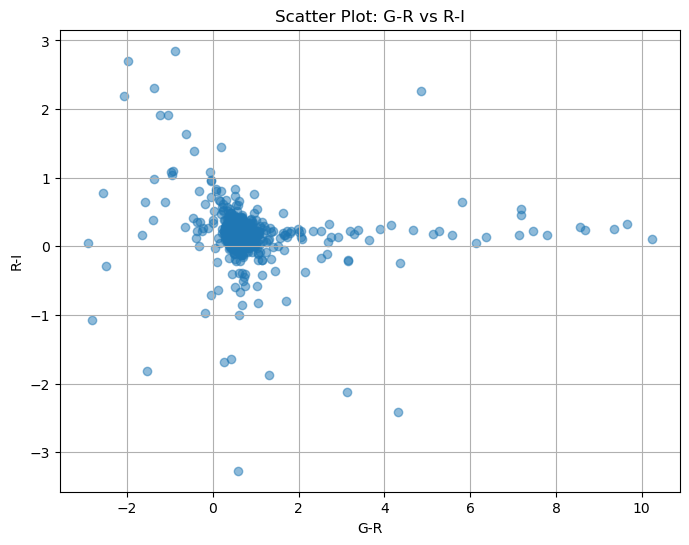

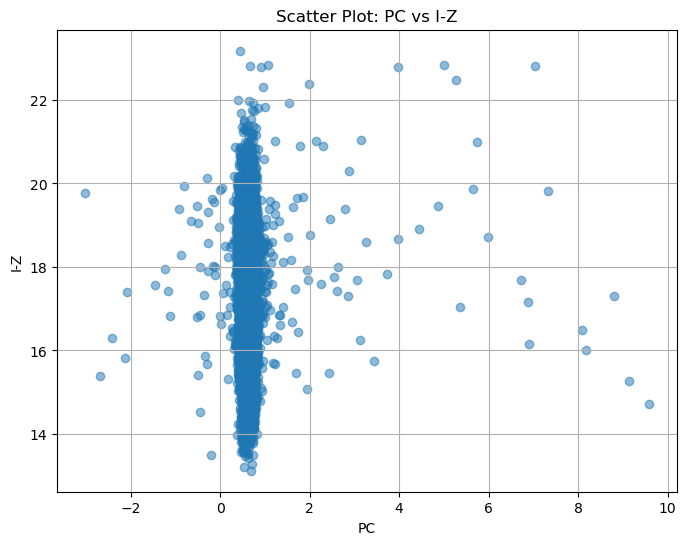

In [42]:

ListPC, ListGR, ListRI = CreateListPC(AllFilG, AllFilR, AllFilI)
plot_scatter(ListGR, ListRI, ListPC, AllFilZ)

## poslednje 4 slike su ključne ... 